# Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Step 1: Define file paths
# Here we set up the paths to load the training and validation datasets.
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), "..", "dataset"))

train_file_path = os.path.join(BASE_PATH, "PAKDD2010_Modeling_Data.csv")
val_file_path = os.path.join(BASE_PATH, "PAKDD2010_Prediction_Data.csv")

# Display the paths to verify they are correct
print(train_file_path)
print(val_file_path)

d:\Cursos\AnyoneIA\Git\pguCRA\dataset\PAKDD2010_Modeling_Data.csv
d:\Cursos\AnyoneIA\Git\pguCRA\dataset\PAKDD2010_Prediction_Data.csv


In [3]:
# Step 2: Load the data
# In this section, we attempt to load the CSV files into Pandas DataFrames.
# We also print messages to confirm that the files were loaded successfully.
try:
    df = pd.read_csv(train_file_path)
    print("Training file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

try:
    test_df = pd.read_csv(val_file_path)
    print("Test file loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

Training file loaded successfully!
Test file loaded successfully!


C:\Users\pedro\AppData\Local\Temp\ipykernel_24340\2806204720.py:5: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(train_file_path)


# Data exploration

In [4]:
# Step 3: Data exploration
# First, we check for columns that contain a single constant value across all rows.
unique_colum_values = [col for col in df.columns if df[col].nunique() == 1]
print(unique_colum_values)

['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD']


In [5]:
# Step 4: Handle missing values
# Replace empty values with NaN to determine the best strategy for imputation.
df.replace(' ', np.nan, inplace=True)
df.replace('', np.nan, inplace=True)
test_df.replace(' ', np.nan, inplace=True)
test_df.replace('', np.nan, inplace=True)

In [6]:
# Check the sum of NaN values in each column to decide whether to drop or impute them.
df_na_counts = df.isna().sum()
print(df_na_counts)

ID_CLIENT                             0
CLERK_TYPE                            0
PAYMENT_DAY                           0
APPLICATION_SUBMISSION_TYPE           0
QUANT_ADDITIONAL_CARDS                0
POSTAL_ADDRESS_TYPE                   0
SEX                                  17
MARITAL_STATUS                        0
QUANT_DEPENDANTS                      0
EDUCATION_LEVEL                       0
STATE_OF_BIRTH                     2064
CITY_OF_BIRTH                      2064
NACIONALITY                           0
RESIDENCIAL_STATE                     0
RESIDENCIAL_CITY                      0
RESIDENCIAL_BOROUGH                  10
FLAG_RESIDENCIAL_PHONE                0
RESIDENCIAL_PHONE_AREA_CODE        8212
RESIDENCE_TYPE                     1349
MONTHS_IN_RESIDENCE                3777
FLAG_MOBILE_PHONE                     0
FLAG_EMAIL                            0
PERSONAL_MONTHLY_INCOME               0
OTHER_INCOMES                         0
FLAG_VISA                             0


In [7]:
# Step 5: Feature selection
# We drop columns with single values, ID columns, and features with more than 50% missing values.
df = df.drop(columns=['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD'])

df = df.drop(columns=['ID_CLIENT'])

df = df.drop(columns=['PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_PHONE_AREA_CODE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL_MATE'])

test_df = test_df.drop(columns=['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_MOBILE_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD'])

test_df = test_df.drop(columns=['ID_CLIENT'])

test_df = test_df.drop(columns=['PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'PROFESSIONAL_PHONE_AREA_CODE', 'MATE_PROFESSION_CODE', 'EDUCATION_LEVEL_MATE'])

In [8]:
# Step 6: Categorizing Features
# We divide the dataset into categorical, discrete numerical, and continuous numerical features
# to apply appropriate feature engineering techniques later.

# Select all numerical features from the dataset
numeric_features = df.select_dtypes(include=['number'])

# Identifying discrete numerical features:
# - Integer columns (`int64`) are often discrete
# - Features with fewer than 20 unique values are considered discrete
# - 'MONTHS_IN_RESIDENCE' is explicitly included as a discrete feature
numerical_discrete_features = [col for col in numeric_features.columns if df[col].dtype == 'int64' or df[col].nunique() < 20 or col == 'MONTHS_IN_RESIDENCE']

# Identifying continuous numerical features:
# - Float columns (`float64`) are usually continuous
# - Exclude any features already classified as discrete
numerical_continuous_features = [col for col in numeric_features.columns if df[col].dtype == 'float64' and col not in numerical_discrete_features]

# Select all categorical columns (text or category data types)
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Creating separate DataFrames for each type of feature
df_discrete = df[numerical_discrete_features]
df_continuous = df[numerical_continuous_features]
df_categorical = df[categorical_features]

# Removing the target variable from the list of discrete features
# since it's the label we aim to predict and should not be used as an input feature.
numerical_discrete_features.remove('TARGET_LABEL_BAD')

# Displaying the categorized features for verification
print("Numeric Features: ", numeric_features.columns.to_list())
print("Discrete Features:", numerical_discrete_features)
print("Continuous Features:", numerical_continuous_features)
print("Categorical Features:", categorical_features)

Numeric Features:  ['PAYMENT_DAY', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'NACIONALITY', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD']
Discrete Features: ['PAYMENT_DAY', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'NACIONALITY', 'RESIDENCE_TYPE', 'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 'PRODUCT', 'AGE']
Continuous Features: ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'PERSONAL_ASSETS_VALUE']
Ca

In [9]:
# Step 7: Validating Feature Categorization
# This step ensures that all features have been correctly categorized into discrete, continuous, or categorical groups
# and that there are no overlapping assignments.

# Print the total count of each feature type
print(len(categorical_features))
print(len(numerical_discrete_features))
print(len(numerical_continuous_features))

# Convert feature lists into sets for easy comparison
set1 = set(categorical_features)
set2 = set(numerical_discrete_features)
set3 = set(numerical_continuous_features)

# Find common features that might have been incorrectly assigned to multiple groups
common_values = set1.intersection(set2, set3)

# Print any overlapping features (should ideally be empty)
print("Common values:", common_values)

13
21
3
Common values: set()


In [10]:
# Step 8: Function to Display Unique Values in Each Feature
# This function helps explore the dataset by printing all unique values present in each column.
# It is useful for understanding categorical variables and checking for inconsistencies.
def print_type_of_values(df):
    for col in df.columns:
        print(f'{col}: {df[col].unique()}')

In [11]:
# Step 9: Handling Missing Values in Categorical Features
# Some categorical variables contain incorrect or placeholder values that need to be replaced with NaN
# to prepare them for proper imputation.

# APPLICATION_SUBMISSION_TYPE: Possible values are ['Web', 'Carga', '0']
# - '0' is likely an incorrect or placeholder value, so we replace it with NaN.

# SEX: Possible values are ['F', 'M', 'N', NaN]
# - 'N' might represent an unknown or missing gender, so we replace it with NaN.

# Replace incorrect values with NaN in the main dataset
df['APPLICATION_SUBMISSION_TYPE'] = df['APPLICATION_SUBMISSION_TYPE'].replace({'0': np.nan})
df['SEX'] = df['SEX'].replace({'N': np.nan})

# Apply the same transformation to the test dataset to maintain consistency
test_df['APPLICATION_SUBMISSION_TYPE'] = test_df['APPLICATION_SUBMISSION_TYPE'].replace({'0': np.nan})
test_df['SEX'] = test_df['SEX'].replace({'N': np.nan})

In [12]:
# Step 10: Checking Missing Values Before Imputation
# Before performing imputation, it's important to check how many NaN values exist in key categorical features
# to determine the best imputation strategy.

# Count occurrences of each unique value, including NaN, in 'APPLICATION_SUBMISSION_TYPE'
print("APPLICATION_SUBMISSION_TYPE Value Counts (Including NaN):")
print(df['APPLICATION_SUBMISSION_TYPE'].value_counts(dropna=False))

# Count occurrences of each unique value, including NaN, in 'SEX'
print("\nSEX Value Counts (Including NaN):")
print(df['SEX'].value_counts(dropna=False))

APPLICATION_SUBMISSION_TYPE Value Counts (Including NaN):
Web      28206
NaN      19461
Carga     2333
Name: APPLICATION_SUBMISSION_TYPE, dtype: int64

SEX Value Counts (Including NaN):
F      30805
M      19130
NaN       65
Name: SEX, dtype: int64


In [13]:
# Step 11: Checking Unique Values in Continuous Features
# To better understand the distribution of continuous numerical variables,
# we print the unique values present in each of them.

# Using the previously defined function to explore unique values in continuous features
print("Unique values in continuous numerical features:")
print_type_of_values(df_continuous)

Unique values in continuous numerical features:
PERSONAL_MONTHLY_INCOME: [ 900.    750.    500.   ...  234.25 1443.27  719.38]
OTHER_INCOMES: [0.00000e+00 1.34000e+02 6.11000e+02 1.45000e+03 3.20000e+02 1.00000e+03
 7.06000e+02 2.50000e+02 3.50000e+02 1.40000e+03 8.00000e+02 7.00000e+02
 9.50000e+01 2.40000e+03 7.47310e+02 2.00000e+03 3.61000e+02 8.30000e+02
 1.80000e+02 4.00000e+02 7.20000e+02 1.50000e+03 2.75000e+02 1.00000e+02
 6.50000e+01 1.20000e+03 6.81000e+02 8.00000e+01 5.00000e+02 2.40000e+02
 5.80000e+02 3.00000e+02 2.81000e+02 2.00000e+02 1.05458e+03 6.00000e+02
 4.25000e+02 5.16000e+02 9.35000e+02 4.66000e+03 3.60000e+02 5.00000e+01
 5.55380e+02 3.96000e+02 1.50000e+01 1.00300e+03 2.63520e+02 5.61000e+02
 4.09000e+02 4.75000e+02 3.50950e+02 9.00000e+02 4.69000e+02 1.20000e+02
 1.50000e+02 4.50000e+02 7.50000e+02 1.63100e+03 1.19000e+03 3.00000e+03
 6.60000e+02 5.20000e+01 7.23290e+02 4.70000e+02 3.90000e+02 3.76000e+02
 6.00000e+03 4.64000e+02 8.50000e+01 4.50000e+01 8.5000

In [14]:
# Step 12: Checking the Number of Unique Values in Discrete Numerical Features
# This helps determine the variability of each discrete feature
# and identify potential categorical-like behavior in numerical data.

# Print the count of unique values for each discrete numerical feature
print("Number of unique values in discrete numerical features:")
print(df_discrete.nunique())

Number of unique values in discrete numerical features:
PAYMENT_DAY                        6
POSTAL_ADDRESS_TYPE                2
MARITAL_STATUS                     8
QUANT_DEPENDANTS                  17
NACIONALITY                        3
RESIDENCE_TYPE                     6
MONTHS_IN_RESIDENCE               88
FLAG_EMAIL                         2
FLAG_VISA                          2
FLAG_MASTERCARD                    2
FLAG_DINERS                        2
FLAG_AMERICAN_EXPRESS              2
FLAG_OTHER_CARDS                   2
QUANT_BANKING_ACCOUNTS             3
QUANT_SPECIAL_BANKING_ACCOUNTS     3
QUANT_CARS                         2
MONTHS_IN_THE_JOB                 21
PROFESSION_CODE                   19
OCCUPATION_TYPE                    6
PRODUCT                            3
AGE                               89
TARGET_LABEL_BAD                   2
dtype: int64


In [15]:
# Step 13: Checking Unique Values in Discrete Numerical Features
# Before deciding on an imputation strategy for missing values,
# it's essential to explore the unique values in discrete numerical features.

# This helps determine whether we should use the mode, median, or another method for imputation.

# Using the previously defined function to print unique values for each discrete feature
print("Unique values in discrete numerical features:")
print_type_of_values(df_discrete)

Unique values in discrete numerical features:
PAYMENT_DAY: [ 5 15 20 10 25  1]
POSTAL_ADDRESS_TYPE: [1 2]
MARITAL_STATUS: [6 2 1 5 3 7 4 0]
QUANT_DEPENDANTS: [ 1  0  2  3  4  5  6  7 10  8 13 11  9 12 14 15 53]
NACIONALITY: [1 0 2]
RESIDENCE_TYPE: [ 1. nan  2.  5.  0.  3.  4.]
MONTHS_IN_RESIDENCE: [ 15.   1.  nan  12.   4.   0.   5.  10.   6.   2.   3.  18.  25.  14.
  16.   8.   7.  20.   9.  17.  30.  11.  37.  22.  33.  26.  40.  32.
  29.  23.  13.  36.  45.  60.  34.  21.  31.  35.  38.  39.  24.  19.
  48.  28.  52.  49.  46.  27.  42.  62.  51.  82.  44.  68.  71.  50.
  47.  41.  57.  69.  55. 200.  53. 100.  72.  43.  70.  54.  56.  80.
  65.  90.  58.  96.  64.  76.  84.  73.  59. 228.  63. 101.  99.  66.
  67.  78.  61.  81.  89.]
FLAG_EMAIL: [1 0]
FLAG_VISA: [1 0]
FLAG_MASTERCARD: [1 0]
FLAG_DINERS: [0 1]
FLAG_AMERICAN_EXPRESS: [0 1]
FLAG_OTHER_CARDS: [0 1]
QUANT_BANKING_ACCOUNTS: [0 1 2]
QUANT_SPECIAL_BANKING_ACCOUNTS: [0 1 2]
QUANT_CARS: [0 1]
MONTHS_IN_THE_JOB: [ 0  9  2

In [16]:
# Step 14: Checking the Number of Unique Values in Categorical Features
# Understanding the number of unique values in categorical variables
# helps determine if they should be one-hot encoded, label encoded,
# or grouped into broader categories.

# Print the count of unique values for each categorical feature
print("Number of unique values in categorical features:")
print(df_categorical.nunique())

Number of unique values in categorical features:
APPLICATION_SUBMISSION_TYPE        3
SEX                                3
STATE_OF_BIRTH                    28
CITY_OF_BIRTH                   9909
RESIDENCIAL_STATE                 27
RESIDENCIAL_CITY                3529
RESIDENCIAL_BOROUGH            14510
FLAG_RESIDENCIAL_PHONE             2
RESIDENCIAL_PHONE_AREA_CODE      101
COMPANY                            2
FLAG_PROFESSIONAL_PHONE            2
RESIDENCIAL_ZIP_3               1481
PROFESSIONAL_ZIP_3              1481
dtype: int64


In [17]:
# Step 15: Checking Unique Values in Categorical Features
# Before deciding on an imputation strategy, it's essential to explore
# the unique values in categorical features.

# This helps determine whether to replace missing values with the mode (most frequent value),
# a specific category, or another method.

# Using the previously defined function to print unique values for each categorical feature
print("Unique values in categorical features:")
print_type_of_values(df_categorical)

Unique values in categorical features:
APPLICATION_SUBMISSION_TYPE: ['Web' 'Carga' '0']
SEX: ['F' 'M' 'N' nan]
STATE_OF_BIRTH: ['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'PA' 'PB' 'MA' nan 'GO' 'AC' 'MT'
 'AL' 'AP' 'TO' 'SC' 'PR' 'MS' 'DF' 'PI' 'RO' 'ES' 'AM' 'SE' 'RR' 'XX']
CITY_OF_BIRTH: ['Assu' 'rio de janeiro' 'GARANHUNS' ... 'ITRATIM' 'lobo leite'
 'PIQUET CARNEIRO CE']
RESIDENCIAL_STATE: ['RN' 'RJ' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'AP' 'MS' 'DF' 'PB' 'MA' 'PA'
 'GO' 'PR' 'MT' 'AL' 'ES' 'SC' 'AM' 'RO' 'PI' 'RR' 'TO' 'SE' 'AC']
RESIDENCIAL_CITY: ['Santana do Matos' 'RIO DE JANEIRO' 'Parnamirim' ... 'Atalaia'
 'DIAS D AVILA' 'conselheiro lafaiete']
RESIDENCIAL_BOROUGH: ['Centro' 'CAMPO GRANDE' 'Boa Esperanca' ... 'JD SAVEIRO' 'JD CASTILHO'
 'jardim vida nova']
FLAG_RESIDENCIAL_PHONE: ['Y' 'N']
RESIDENCIAL_PHONE_AREA_CODE: ['105' '20' nan '33' '81' '12' '54' '107' '32' '39' '5' '24' '123' '75'
 '66' '103' '112' '125' '58' '69' '40' '97' '71' '86' '119' '100' '27'
 '120' '16' '67' '50' '46

# Data split to avoid data leakage

In [18]:
# Step 16: Splitting the Dataset into Training and Validation Sets  
# To train and evaluate the model, we need to separate the dataset into features (X) and target (y).
from sklearn.model_selection import train_test_split

# Define features (X) by dropping the target variable
X = df.drop(columns=['TARGET_LABEL_BAD'])  # Independent variables

# Define target variable (y) which we aim to predict 
y = df['TARGET_LABEL_BAD']  # Dependent variable

# Split the dataset into training (80%) and validation (20%) sets
# `random_state=42` ensures reproducibility of results
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and validation datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Validation Features Shape: {X_valid.shape}")

Training Features Shape: (40000, 37)
Validation Features Shape: (10000, 37)


In [19]:
# Step 17: Imputation for Continuous (Numerical) Features
# Missing values in continuous features can affect model performance.
# We use mean imputation to replace NaNs with the average value of each feature.
from sklearn.impute import SimpleImputer

# Initialize the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training set's continuous numerical features
imputer.fit(X_train[numerical_continuous_features])

# Transform the training, validation, and test sets using the trained imputer
X_train[numerical_continuous_features] = imputer.transform(X_train[numerical_continuous_features])
X_valid[numerical_continuous_features] = imputer.transform(X_valid[numerical_continuous_features])
test_df[numerical_continuous_features] = imputer.transform(test_df[numerical_continuous_features])

In [20]:
# Step 18: Imputation for Discrete Numerical Features
# Missing values in discrete features (e.g., categorical-like numerical values)
# can impact model performance. We replace NaNs with the most frequent value
# to preserve data distribution.

# Initialize the imputer with the most frequent strategy
discrete_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training set's discrete numerical features
discrete_imputer.fit(X_train[numerical_discrete_features])

# Transform the training, validation, and test sets using the trained imputer
X_train[numerical_discrete_features] = discrete_imputer.transform(X_train[numerical_discrete_features])
X_valid[numerical_discrete_features] = discrete_imputer.transform(X_valid[numerical_discrete_features])
test_df[numerical_discrete_features] = discrete_imputer.transform(test_df[numerical_discrete_features])

In [21]:
# Step 19: Imputation for Categorical Features
# Missing values in categorical features can cause issues in machine learning models,
# especially for encoding techniques. We replace NaNs with the most frequent category
# to maintain data consistency.

# Initialize the imputer with the most frequent strategy
discrete_imputer_cat = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training set's categorical features
discrete_imputer_cat.fit(X_train[categorical_features])

# Transform the training, validation, and test sets using the trained imputer
X_train[categorical_features] = discrete_imputer_cat.transform(X_train[categorical_features])
X_valid[categorical_features] = discrete_imputer_cat.transform(X_valid[categorical_features])
test_df[categorical_features] = discrete_imputer_cat.transform(test_df[categorical_features])

# EDA (after data imputation)

TARGET_LABEL_BAD
0    36959
1    13041
Name: TARGET_LABEL_BAD, dtype: int64
0s:  73.91799999999999
1s:  26.082


<Axes: xlabel='TARGET_LABEL_BAD', ylabel='count'>

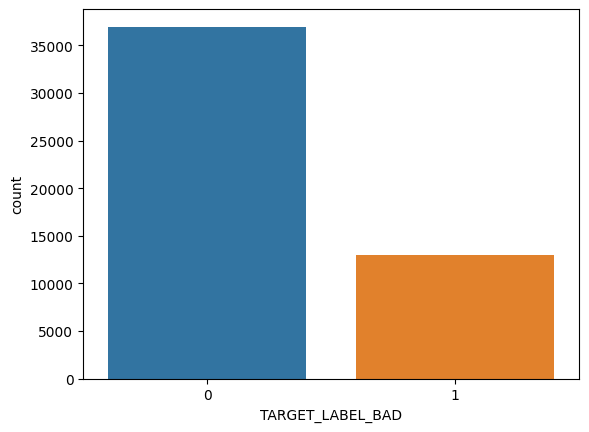

In [22]:
# Step 20: Show Distribution of the Target Variable
# The target variable 'TARGET_LABEL_BAD' represents whether a customer is considered 'bad' (1) or 'good' (0) based on their credit risk.
# It is important to analyze the distribution of the target variable to check if the dataset is imbalanced, as imbalanced classes
# could affect the performance of machine learning models.

# Count the occurrences of each class (0 and 1) in the target variable
count = df.groupby('TARGET_LABEL_BAD')['TARGET_LABEL_BAD'].count()

# Print the number of instances for each class (0 and 1)
print(count)

# Calculate and print the percentage of '0s' (good customers)
print('0s: ', count[0] / len(df['TARGET_LABEL_BAD']) * 100)

# Calculate and print the percentage of '1s' (bad customers)
print('1s: ', count[1] / len(df['TARGET_LABEL_BAD']) * 100)

# Visualize the distribution of the target variable using a countplot
# This helps in visually identifying the imbalance (if any) between the two classes
sns.countplot(x = 'TARGET_LABEL_BAD', data = df)

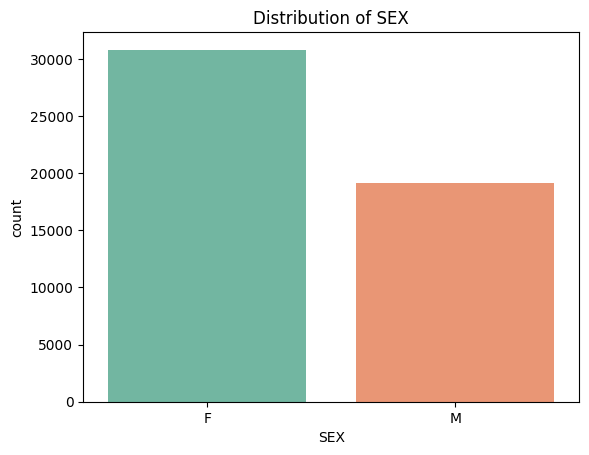

In [23]:
# Step 21: Show Distribution of the 'SEX' Variable
# The 'SEX' variable represents the gender of the applicants. Understanding the distribution of this feature
# can help in identifying any potential gender imbalance in the dataset, which may affect model performance or fairness.

# Visualize the distribution of the 'SEX' variable using a countplot
# This plot displays the count of male and female applicants in the dataset.
sns.countplot(x='SEX', data=df, palette="Set2")

# Add a title to the plot for clarity
plt.title("Distribution of SEX")

# Show the plot
plt.show()

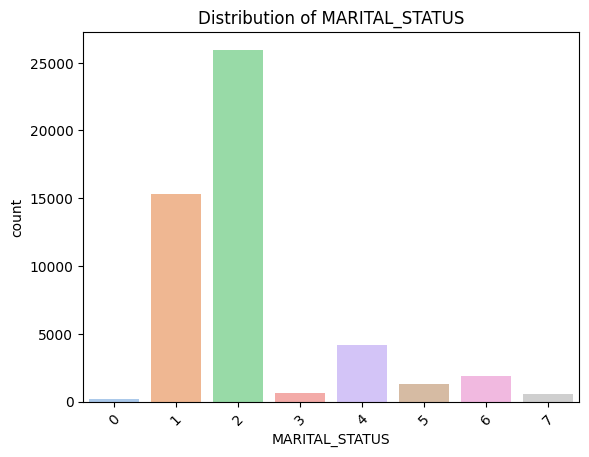

In [24]:
# Step 22: Show Distribution of the 'MARITAL_STATUS' Variable
# The 'MARITAL_STATUS' variable indicates the marital status of the applicants. Analyzing the distribution of this feature
# can provide insights into the demographic characteristics of the dataset and help assess whether marital status has
# any impact on credit risk prediction.

# Visualize the distribution of the 'MARITAL_STATUS' variable using a countplot
# This plot shows the count of different marital statuses (e.g., single, married) in the dataset.
sns.countplot(x='MARITAL_STATUS', data=df, palette="pastel")

# Add a title to the plot for clarity
plt.title("Distribution of MARITAL_STATUS")

# Rotate the x-axis labels for better readability if the categories have long names
plt.xticks(rotation=45)

# Show the plot
plt.show()

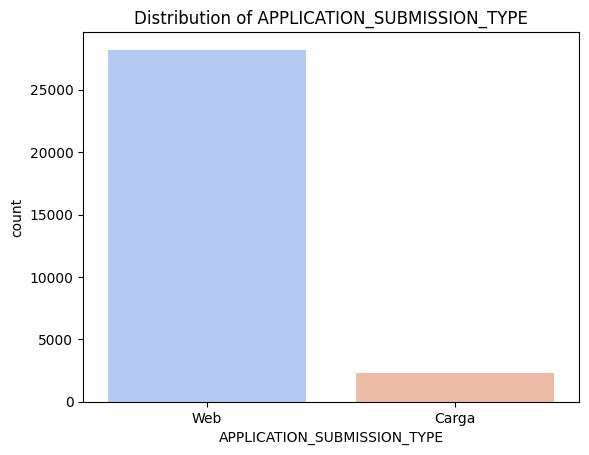

In [25]:
# Step 23: Show Distribution of the 'APPLICATION_SUBMISSION_TYPE' Variable
# The 'APPLICATION_SUBMISSION_TYPE' variable indicates how the credit application was submitted by the applicant
# (e.g., online or in person). Analyzing this feature can reveal whether the submission method has any influence on
# the credit risk or if certain submission types are more common in the dataset.

# Visualize the distribution of the 'APPLICATION_SUBMISSION_TYPE' variable using a countplot
# This plot shows the count of applications submitted through different methods (e.g., online vs in person).
sns.countplot(x='APPLICATION_SUBMISSION_TYPE', data=df, palette="coolwarm")

# Add a title to the plot for clarity
plt.title("Distribution of APPLICATION_SUBMISSION_TYPE")

# Show the plot
plt.show()

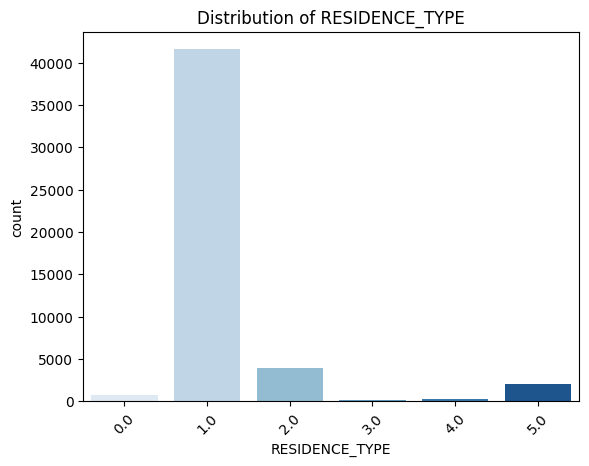

In [26]:
# Step 24: Show Distribution of the 'RESIDENCE_TYPE' Variable
# The 'RESIDENCE_TYPE' variable indicates the type of residence the applicant lives in (e.g., house, apartment).
# Analyzing the distribution of this feature can provide insights into the living conditions of the applicants and
# help assess whether certain residence types are more prevalent among different credit risk categories.

# Visualize the distribution of the 'RESIDENCE_TYPE' variable using a countplot
# This plot shows the count of applicants based on the type of residence they live in.
sns.countplot(x='RESIDENCE_TYPE', data=df, palette="Blues")

# Add a title to the plot for clarity
plt.title("Distribution of RESIDENCE_TYPE")

# Rotate the x-axis labels for better readability if the categories have long names
plt.xticks(rotation=45)

# Show the plot
plt.show()

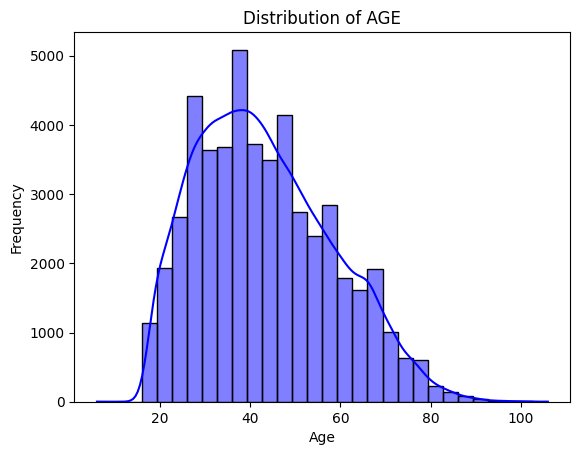

In [27]:
# Step 25: Show Distribution of the 'AGE' Variable
# The 'AGE' variable represents the age of the applicant. Understanding the distribution of age can provide insights
# into the demographic makeup of the dataset and help assess if age correlates with credit risk.

# Visualize the distribution of the 'AGE' variable using a histogram with a KDE (Kernel Density Estimation)
# This plot shows the frequency distribution of applicants' ages, with the additional smoothed line (KDE) to
# better visualize the age distribution's shape.
sns.histplot(df["AGE"], bins=30, kde=True, color="blue")

# Add a title to the plot for clarity
plt.title("Distribution of AGE")

# Label the x-axis with 'Age'
plt.xlabel("Age")

# Label the y-axis with 'Frequency'
plt.ylabel("Frequency")

# Show the plot
plt.show()

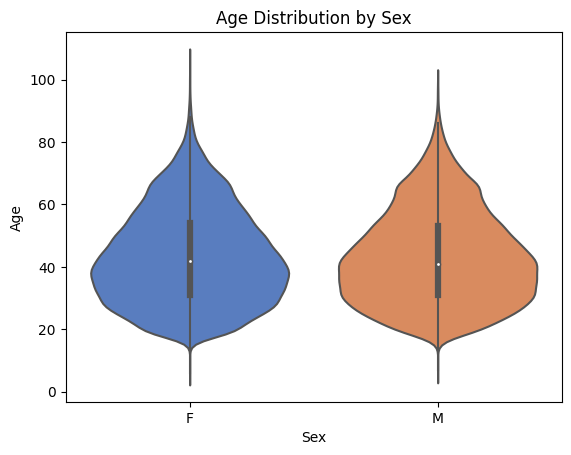

In [28]:
# Step 26: Show Age Distribution by Sex
# This analysis helps us understand the relationship between the applicant's age and their gender (SEX).
# Using a violin plot allows us to visualize the distribution of ages for each gender, including the density
# of different age ranges, and see if there are any notable differences in age distributions between male and female applicants.

# Visualize the distribution of age by sex using a violin plot
# The violin plot displays the distribution of ages for both male and female applicants, with a mirrored density plot.
sns.violinplot(x="SEX", y="AGE", data=df, palette="muted")

# Add a title to the plot for clarity
plt.title("Age Distribution by Sex")

# Label the x-axis with 'Sex'
plt.xlabel("Sex")

# Label the y-axis with 'Age'
plt.ylabel("Age")

# Show the plot
plt.show()

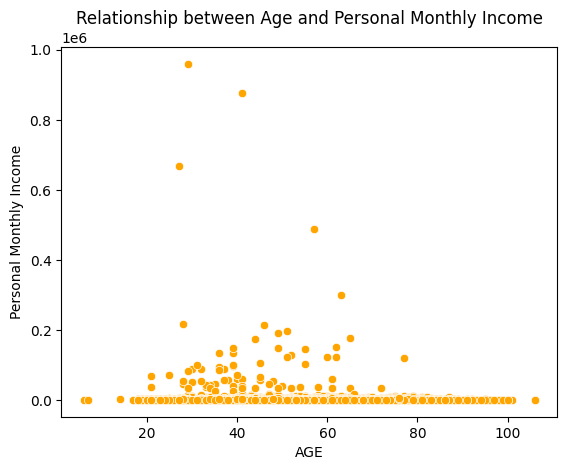

In [29]:
# Step 27: Show Relationship between Age and Personal Monthly Income
# This analysis explores the relationship between an applicant's age and their personal monthly income.
# By visualizing this relationship, we can observe any trends or patterns, such as whether income tends to increase
# with age or if there are any unusual outliers in the dataset.

# Visualize the relationship between age and personal monthly income using a scatter plot
# The scatter plot displays individual data points, where each point represents an applicant's age and their corresponding personal monthly income.
sns.scatterplot(x="AGE", y="PERSONAL_MONTHLY_INCOME", data=df, color="orange")

# Add a title to the plot for clarity
plt.title("Relationship between Age and Personal Monthly Income")

# Label the x-axis with 'AGE'
plt.xlabel("AGE")

# Label the y-axis with 'Personal Monthly Income'
plt.ylabel("Personal Monthly Income")

# Show the plot
plt.show()

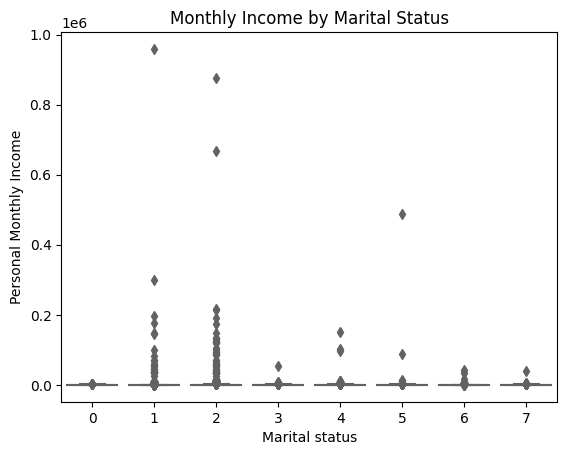

In [30]:
# Step 28: Show Monthly Income by Marital Status
# This analysis examines how marital status (e.g., single, married) may influence the applicant's monthly income.
# A boxplot is used to visualize the distribution of personal monthly income for each marital status category,
# allowing us to observe the central tendency, spread, and potential outliers in income by marital status.

# Visualize the monthly income distribution by marital status using a boxplot
# The boxplot shows the distribution of personal monthly income for each marital status category, highlighting the median,
# quartiles, and potential outliers in the income data.
sns.boxplot(x="MARITAL_STATUS", y="PERSONAL_MONTHLY_INCOME", data=df, palette="Set3")

# Add a title to the plot for clarity
plt.title("Monthly Income by Marital Status")

# Label the x-axis with 'Marital status'
plt.xlabel("Marital status")

# Label the y-axis with 'Personal Monthly Income'
plt.ylabel("Personal Monthly Income")

# Show the plot
plt.show()

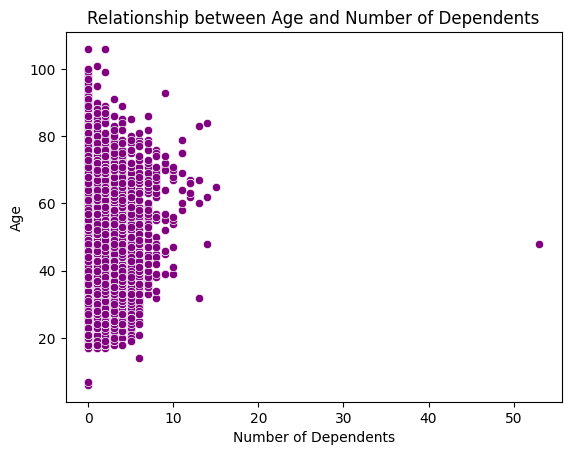

In [31]:
# Step 29: Show Relationship between Age and Number of Dependents
# This analysis examines the relationship between the applicant's age and the number of dependents they have.
# A scatter plot is used to visualize how the number of dependents might correlate with age, allowing us to identify
# any patterns or outliers in this relationship.

# Visualize the relationship between the number of dependents and age using a scatter plot
# The scatter plot displays individual data points, where each point represents the number of dependents and the corresponding age of the applicant.
sns.scatterplot(x="QUANT_DEPENDANTS", y="AGE", data=df, color="purple")

# Add a title to the plot for clarity
plt.title("Relationship between Age and Number of Dependents")

# Label the x-axis with 'Number of Dependents'
plt.xlabel("Number of Dependents")

# Label the y-axis with 'Age'
plt.ylabel("Age")

# Show the plot
plt.show()

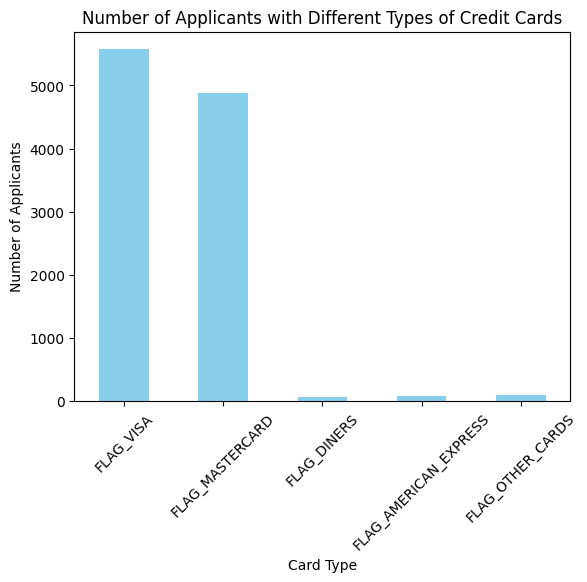

In [32]:
# Step 30: Show Number of Applicants with Different Types of Credit Cards
# This analysis explores how many applicants have each type of credit card (e.g., VISA, MasterCard, Diners Club, etc.).
# The analysis helps to understand the prevalence of different types of credit cards among the applicants and can offer
# insights into the financial behavior of the applicants in relation to their credit cards.

# Sum the number of applicants who have each type of credit card by summing the flag columns
# The flag columns ('FLAG_VISA', 'FLAG_MASTERCARD', etc.) indicate whether an applicant has a particular type of credit card.
flags = ['FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS']
df_flags = df[flags].sum()

# Plot the number of applicants with each type of credit card using a bar chart
df_flags.plot(kind='bar', color='skyblue')

# Add a title to the plot for clarity
plt.title("Number of Applicants with Different Types of Credit Cards")

# Label the x-axis with 'Card Type'
plt.xlabel("Card Type")

# Label the y-axis with 'Number of Applicants'
plt.ylabel("Number of Applicants")

# Rotate the x-axis labels to improve readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

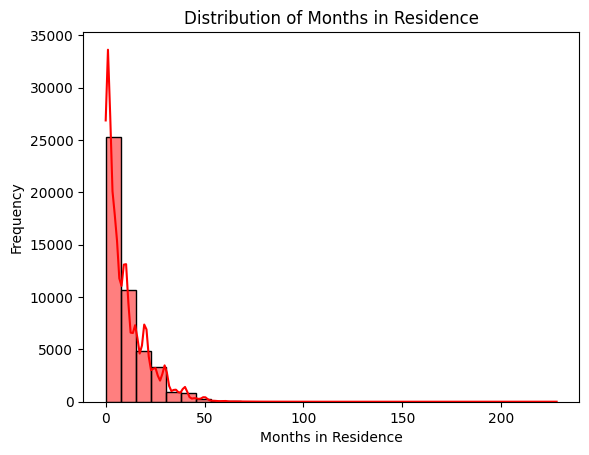

In [33]:
# Step 31: Show Distribution of Months in Residence
# This analysis examines the distribution of the number of months applicants have lived at their current residence.
# Understanding the distribution of months in residence can help identify stability in applicants' living situations, 
# which may be relevant for assessing their creditworthiness.

# Visualize the distribution of months in residence using a histogram
# The histogram displays the frequency of applicants who have lived in their current residence for various lengths of time.
# The kernel density estimate (KDE) provides a smooth curve that estimates the probability density function of the data.
sns.histplot(df["MONTHS_IN_RESIDENCE"], bins=30, kde=True, color="red")

# Add a title to the plot for clarity
plt.title("Distribution of Months in Residence")

# Label the x-axis with 'Months in Residence'
plt.xlabel("Months in Residence")

# Label the y-axis with 'Frequency'
plt.ylabel("Frequency")

# Show the plot
plt.show()

# Standardizing and encoding

In [34]:
# Step 32: Standardizing Continuous Features
# Standardization is an important step when working with machine learning models that are sensitive to the scale of the data, such as linear models and neural networks.
# This step ensures that all continuous numerical features have the same scale, which helps improve the model's performance and convergence speed.
# The StandardScaler transforms the features by removing the mean and scaling them to unit variance.

# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set's continuous numerical features
# The scaler calculates the mean and standard deviation for each feature in the training set.
scaler.fit(X_train[numerical_continuous_features])

# Transform the training, validation, and test sets using the fitted scaler
# The continuous features in the training, validation, and test sets are scaled based on the mean and standard deviation
# calculated from the training set.
X_train[numerical_continuous_features] = scaler.transform(X_train[numerical_continuous_features])
X_valid[numerical_continuous_features] = scaler.transform(X_valid[numerical_continuous_features])
test_df[numerical_continuous_features] = scaler.transform(test_df[numerical_continuous_features])

In [35]:
# Step 33: Defining the List of Features for Different Types of Encoding
# In this step, we define which features will be encoded using different techniques: 
# - One-Hot Encoding (OHE)
# - Frequency Encoding
# - Binary Encoding (for binary features)

# List of features that will be processed with binary encoding or other custom encoding schemes
two_feature_list = ['APPLICATION_SUBMISSION_TYPE', 'SEX', 'FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE']

# List of features that will be encoded using One-Hot Encoding (OHE)
# One-Hot Encoding creates binary columns for each category in the feature, allowing categorical features to be used by machine learning models.
ohe_features = ['STATE_OF_BIRTH', 'RESIDENCIAL_STATE', 'PAYMENT_DAY', 'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS', 'NACIONALITY', 'RESIDENCE_TYPE',
                 'MONTHS_IN_RESIDENCE', 'QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PROFESSION_CODE', 'OCCUPATION_TYPE', 
                 'PRODUCT', 'AGE']

# List of features that will be encoded using Frequency Encoding
# Frequency Encoding replaces each category in the feature with the frequency (count) of that category in the dataset.
freq_enc_features = ['CITY_OF_BIRTH', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'RESIDENCIAL_PHONE_AREA_CODE', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']

In [36]:
# Step 34: Applying Ordinal Encoding
# Ordinal Encoding is used to convert categorical features with an inherent order into numerical values.
# This technique assigns an integer to each category based on its order. It is particularly useful when the feature 
# represents categories that have a clear ranking or order.

# Importing OrdinalEncoder from scikit-learn
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Initialize the OrdinalEncoder
# The handle_unknown parameter ensures that if a new category (not seen during training) appears, 
# it will be encoded as -1 instead of causing an error.
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the ordinal encoder on the training set's categorical features that are to be encoded ordinally
# The encoder will learn the encoding scheme from the training set, based on the order of the categories.
ordinal_encoder.fit(X_train[two_feature_list])

# Transform the training, validation, and test sets using the fitted ordinal encoder
# Each category in the selected features will be replaced by an integer that represents its ordinal position.
X_train[two_feature_list] = ordinal_encoder.transform(X_train[two_feature_list])
X_valid[two_feature_list] = ordinal_encoder.transform(X_valid[two_feature_list])
test_df[two_feature_list] = ordinal_encoder.transform(test_df[two_feature_list])

In [37]:
# Step 35: Apply One-Hot Encoding
# One-Hot Encoding is a technique to convert categorical variables into a binary (0 or 1) format.
# This encoding creates new binary columns for each category in the original feature, representing the presence or absence
# of each category. It is commonly used when the categorical features do not have an inherent order (nominal data).

# Initialize the OneHotEncoder
# handle_unknown='ignore' means that any category in the test or validation data that is not seen during training
# will be ignored (i.e., treated as all zeros).
# sparse_output=False ensures that the output will be a dense array (DataFrame), instead of a sparse matrix.
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the OneHotEncoder on the training set's categorical features that need encoding
ohe_encoder.fit(X_train[ohe_features])

# Transform the training, validation, and test sets using the fitted OneHotEncoder
# The original categorical features will be replaced by their one-hot encoded representations.
train_encoded = ohe_encoder.transform(X_train[ohe_features])
val_encoded = ohe_encoder.transform(X_valid[ohe_features])
test_encoded = ohe_encoder.transform(test_df[ohe_features])

# Get the new feature names for the one-hot encoded columns
# These are the names of the binary columns that will represent the categories.
encoded_feature_names = ohe_encoder.get_feature_names_out(ohe_features)

# Convert the encoded arrays to DataFrames with the new feature names
# This makes it easier to handle and concatenate the new columns with the original dataset.
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe_encoder.get_feature_names_out(ohe_features))
val_encoded_df = pd.DataFrame(val_encoded, columns=ohe_encoder.get_feature_names_out(ohe_features))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe_encoder.get_feature_names_out(ohe_features))

# Reset the index of the encoded DataFrames to match the original DataFrames
# This avoids any potential mismatch of indices when concatenating the original and encoded data.
train_encoded_df.index = X_train.index
val_encoded_df.index = X_valid.index
test_encoded_df.index = test_df.index

# Drop the original categorical columns and concatenate the new one-hot encoded columns
# The new one-hot encoded columns will now be part of the data, replacing the original categorical columns.
train_df = pd.concat([X_train.drop(columns=ohe_features), train_encoded_df], axis=1)
val_df = pd.concat([X_valid.drop(columns=ohe_features), val_encoded_df], axis=1)
test_df = pd.concat([test_df.drop(columns=ohe_features), test_encoded_df], axis=1)

In [38]:
# Step 36: Apply Frequency Encoding
# Frequency Encoding is a technique to transform categorical variables into numerical variables based on the frequency
# of each category's occurrence in the dataset. It replaces each category with the proportion of times it appears in the data.

# Creating a dictionary to store frequency mappings for each feature
freq_maps = {}

# Looping over the list of features that need frequency encoding
for col in freq_enc_features:
    # Calculate the frequency distribution (proportions) of categories in the training set for each feature
    # value_counts(normalize=True) returns the proportion of occurrences of each category.
    freq_map = train_df[col].value_counts(normalize=True)

    # Store the frequency map for each feature in the dictionary
    freq_maps[col] = freq_map

    # Calculate the global mean frequency for each feature
    mean_freq = freq_map.mean()

    # Map the original categorical feature to its frequency
    # In this step, each category is replaced by its frequency in the training set
    train_df[col] = train_df[col].map(freq_map)

    # For validation and test sets, use the frequency mapping from the training set
    # Missing categories in validation or test sets are filled with the global mean frequency
    val_df[col] = val_df[col].map(freq_map).fillna(mean_freq)
    test_df[col] = test_df[col].map(freq_map).fillna(mean_freq)

In [39]:
# Step 37: Print the shape of the dataframes
# The 'shape' attribute returns a tuple representing the dimensions of the DataFrame (rows, columns).

# Print the dimensions (number of rows and columns) of the training dataframe
print(train_df.shape)

# Print the dimensions (number of rows and columns) of the validation dataframe
print(val_df.shape)

# Print the dimensions (number of rows and columns) of the testing dataframe
print(test_df.shape)

(40000, 326)
(10000, 326)
(20000, 326)


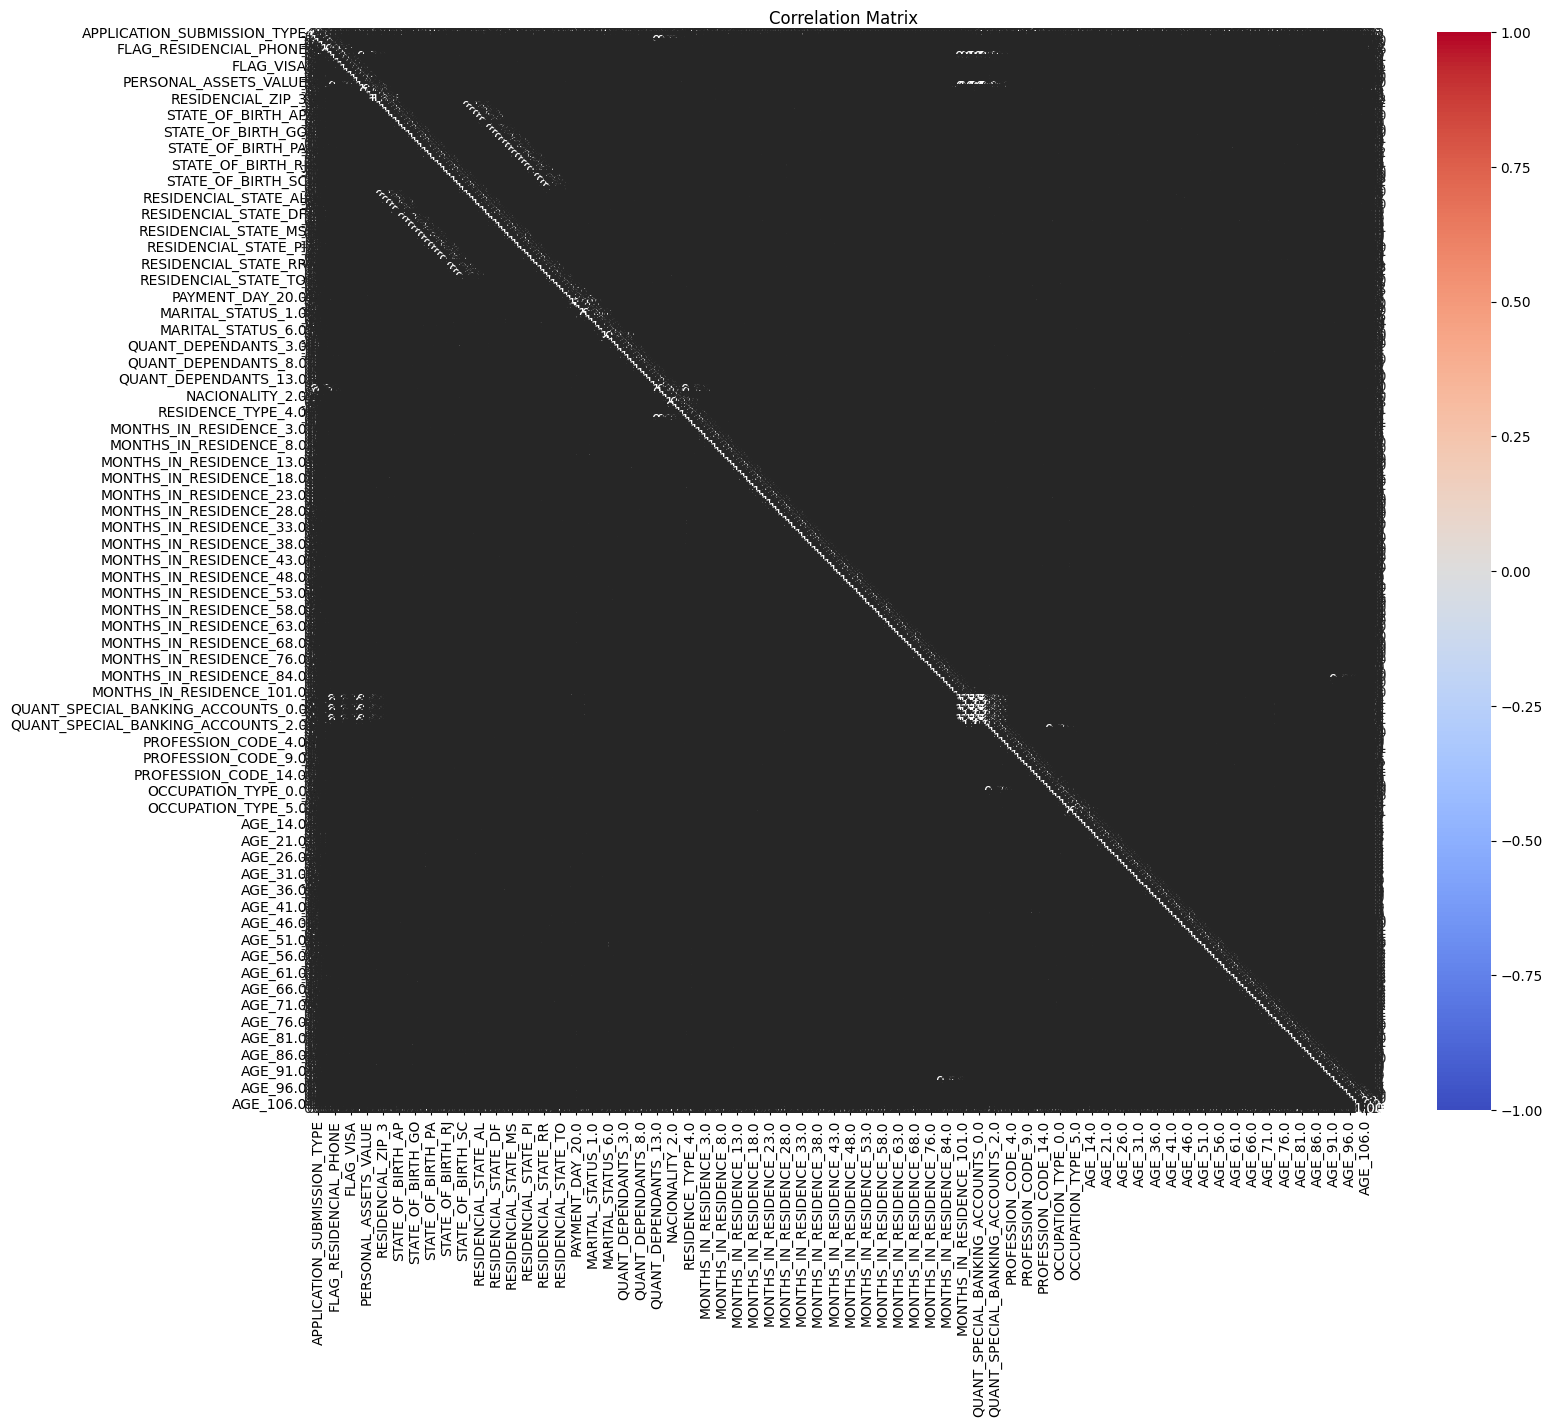

Correlation with TARGET_LABEL_BAD:
APPLICATION_SUBMISSION_TYPE    0.017611
SEX                            0.020252
CITY_OF_BIRTH                 -0.001844
RESIDENCIAL_CITY               0.026028
RESIDENCIAL_BOROUGH           -0.022439
                                 ...   
AGE_98.0                      -0.004185
AGE_99.0                      -0.004185
AGE_101.0                      0.008448
AGE_106.0                      0.008448
TARGET_LABEL_BAD               1.000000
Name: TARGET_LABEL_BAD, Length: 327, dtype: float64


In [40]:
# Step 38: Calculate and visualize the Correlation Matrix

# Concatenate the target variable (y_train) with the transformed training data (train_df)
# This allows us to analyze the correlation of the features with the target variable.
transformed_df = pd.concat([train_df, y_train], axis=1)

# Calculate the correlation matrix for all features in the transformed DataFrame
correlation_matrix = transformed_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(17, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# `annot=True` annotates each cell with the correlation value, `cmap='coolwarm'` defines the color map,
# `fmt='.2f'` formats the annotations to 2 decimal places, `linewidths=0.5` adds space between the cells
plt.title("Correlation Matrix")  # Add title to the plot
plt.show()  # Display the heatmap

# Step 39: Check the correlation with the target variable (TARGET_LABEL_BAD)
# This can be done by simply inspecting the last column (which corresponds to the target variable)
# in the correlation matrix.

# Print the correlation values of all features with the target variable
print("Correlation with TARGET_LABEL_BAD:")
print(correlation_matrix['TARGET_LABEL_BAD'])

# Saving clean data for modeling

In [41]:
# Step 40: Save preprocessed datasets and target variables to CSV files

# Save the transformed training data (features) to a CSV file
train_df.to_csv('../dataset/X_train_data.csv', index=False)
# `index=False` ensures that the index of the DataFrame is not included in the CSV file.

# Save the training target variable to a CSV file
y_train.to_csv('../dataset/y_train_data.csv', index=False)

# Save the transformed validation data (features) to a CSV file
val_df.to_csv('../dataset/X_val_data.csv', index=False)

# Save the validation target variable to a CSV file
y_valid.to_csv('../dataset/y_val_data.csv', index=False)